# Eplanatory Data Analysis On Telco Churn Dataset


# Loading Data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
sns.set(style="whitegrid")
df=pd.read_csv("telco_dataset.csv")
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


# Analysis

# Aim: 

The aim is to reduce our target variable - Churn.

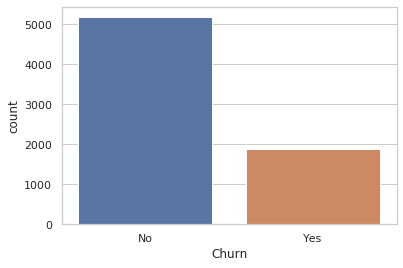

In [336]:
sns.countplot("Churn",data=df)

- We see that number of people who churn are significantly less than people who don't.

# Numeric Data:

## Tenure

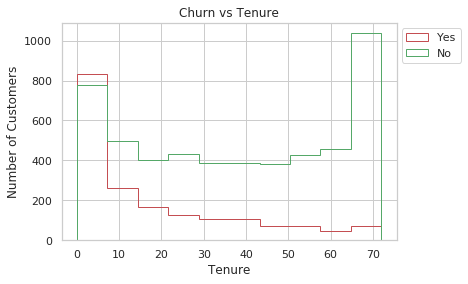

In [3]:
temp1=list(df["tenure"])
temp2=list(df["Churn"])
ltenure=min(temp1)
utenure=max(temp1)
increment=(utenure-ltenure)/10
tenure_bins=[ltenure+i*increment for i in range(11)]
churn_tenure=[temp1[i] for i in range(len(temp1)) if temp2[i]=="Yes"]
no_churn_tenure=[temp1[i] for i in range(len(temp1)) if temp2[i]=="No"]
plt.hist(churn_tenure,tenure_bins,histtype="step",color='r',label="Yes")
plt.hist(no_churn_tenure,tenure_bins,histtype="step",color='g',label="No")
#plt.plot(x,y,color=b)
plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.legend(bbox_to_anchor=(1,1))
plt.title("Churn vs Tenure")
plt.show()

- This histogram clearly shows that people with shoter tenure leave the most.\
However, we can come to a better conclusion through probability density.
Calculating probability densities for the three numeric parameters:

In [4]:
def probDensity(param):
    plt.title("Probability Density for "+param)
    plt.plot([],[])
    sns.kdeplot(df[df["Churn"]=="Yes"][param],color="crimson",label="Yes")
    sns.kdeplot(df[df["Churn"]=="No"][param],color="limegreen",label="No")

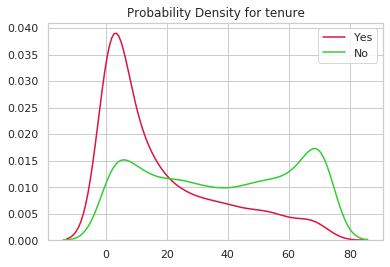

In [5]:
probDensity("tenure")

Which confirms our previous conclusion.

## Monthly Charges

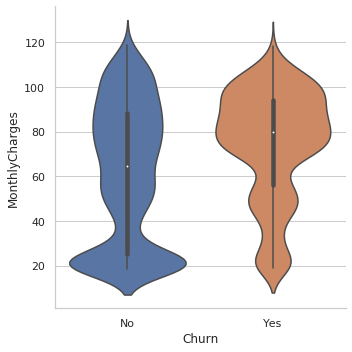

In [6]:
sns.catplot(x="Churn",y="MonthlyCharges",kind="violin",data=df)

- Obviously,people with higher monthly charges churn more.\
Moving on to probability density:

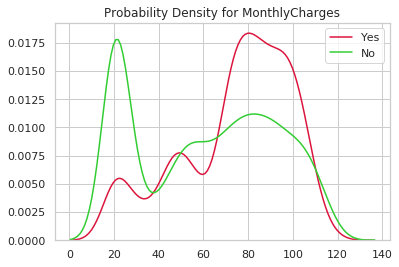

In [7]:
probDensity("MonthlyCharges")

- We can conclude that people with higher monthly charges have a higher probability of churning.

## Total Charges:

In [8]:
#probDensity("TotalCharges")

Here we get error because of empty spaces.

In [110]:
df["TotalCharges"] = df["TotalCharges"].replace(" ", 0)

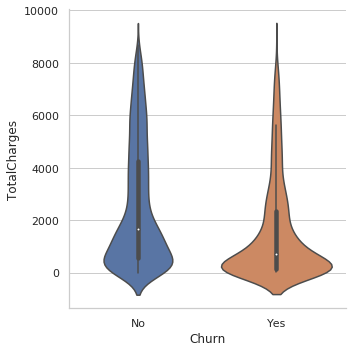

In [111]:
sns.catplot(x="Churn",y="TotalCharges",kind="violin",data=df)

- Suprisingly,people with higher total charges churn less.\
Checking probility density just to understand quantitatively:

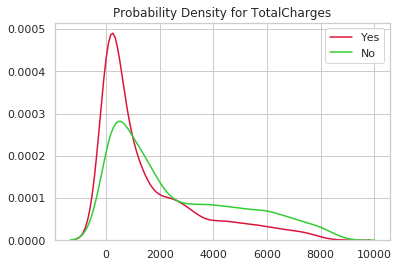

In [112]:
probDensity("TotalCharges")

The results are a little counter intuitive at first glance.
People who churn are concentrated in the low total Charges region.
People who do not churn are also concentrated there.
Explanation for this would be: 
> - Customers with high total charges are likely to have had longer tenures and hence lower churn probability.
> - Customers with low total charges are likely to have had shorter tenures and hence higher churn probability.

# Categorical Parameters:

In [12]:
def percent(param,data,ch):
    temp=df[df[param]==data]
    temp1=temp[df["Churn"]==ch]
    return len(temp1)/len(temp)*100

In [295]:
def percentPlot(param):
    x=[]
    y=[]
    c=[]
    d={param:x,"Probability":y,"Churn":c}
    for i in df[param].unique():
        x.append(i)
        x.append(i)
        y.append(percent(param,i,"Yes"))
        y.append(percent(param,i,"No"))
        c.append("Yes")
        c.append("No")
    d=pd.DataFrame(data=d)   
    sns.factorplot(x=param, y="Probability", hue="Churn", data=d, kind="bar")

# Personal Details:

## Gender:

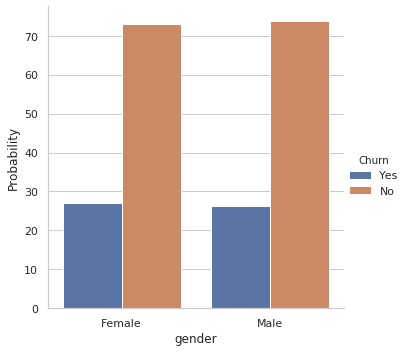

In [296]:
percentPlot("gender")

- The probability to churn and not to churn is exactly the same for both men and women.
> Therefore gender is not an important factor that determines churn rate.

# Streaming Movies:

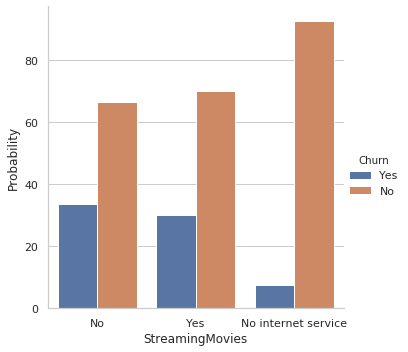

In [15]:
percentPlot("StreamingMovies")

This plot reveals that:

- People,who do not have an internet connection churn less.
- For people having internet connection the probability to churn or not is more or less independant of whether they stream movies or not.

## Senior Citizen:

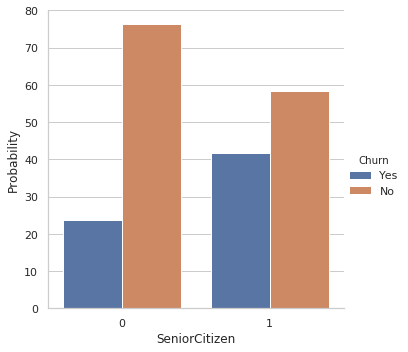

In [16]:
percentPlot("SeniorCitizen")

 - It is obvious from the graph that the probability of a senior citzen churning is almost twice that of a non senior citizen.

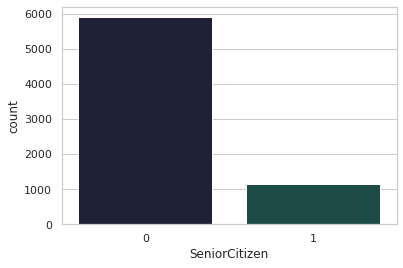

In [17]:
sns.countplot(x="SeniorCitizen",palette=sns.color_palette("cubehelix", 7),data=df)

 - One positive factor is that proportion of senior citizens is less.

## Partner:

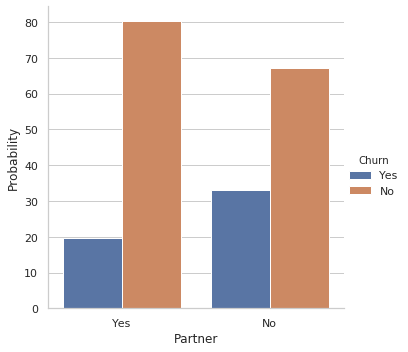

In [18]:
percentPlot("Partner")

 - This indicates that people with partner have less probability of churning.

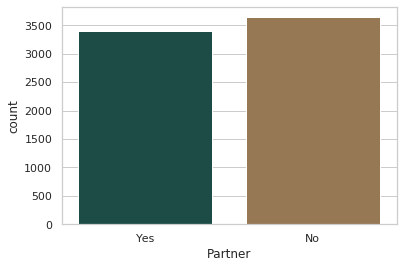

In [19]:
sns.countplot(x="Partner",palette=sns.color_palette("cubehelix", 3),data=df)

 - People with partners are slightly less in number than people without.

## Dependants:

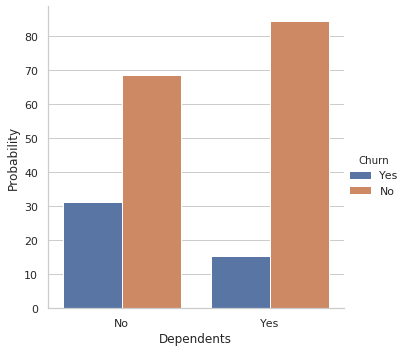

In [20]:
percentPlot("Dependents");

 - Dependants have less probability of churning.

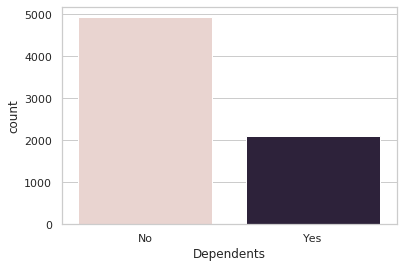

In [21]:
sns.countplot(x="Dependents",palette=sns.cubehelix_palette(2),data=df)

 - However proportion of dependants is less.

# Technical Specifications:

## Services Availed:

### Phone service:

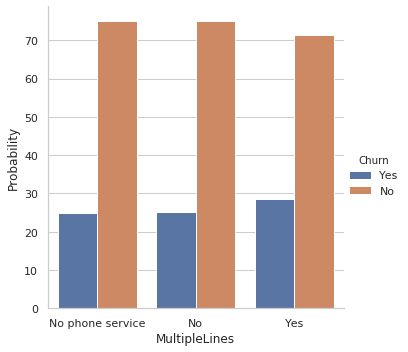

In [49]:
percentPlot("MultipleLines")

- People with phone services are equally likely to churn as compared to people eithout phone services.
- People with multiple lines are slightly more likely to churn.

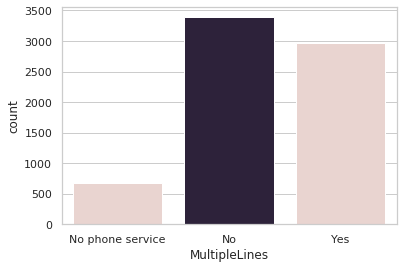

In [56]:
sns.countplot("MultipleLines",palette=sns.cubehelix_palette(2),data=df)

- Very few people do not have phone service.
- Fewer people have multiple lines which is a positive indicator.

### Internet Service:

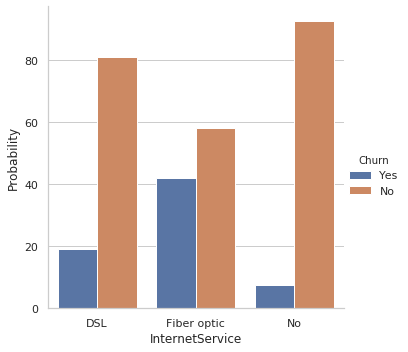

In [57]:
percentPlot("InternetService")

- People without internet service are less likely to churn.
- People with slower internet are less likely to churn than people wuth fibre optic connection.

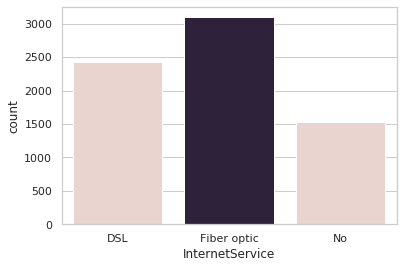

In [59]:
sns.countplot("InternetService",palette=sns.cubehelix_palette(2),data=df)

- But the number of people with Fibre optic connection $>$ Number of people with DSL $>$ Number of people without connection.

## Additional internet Services:

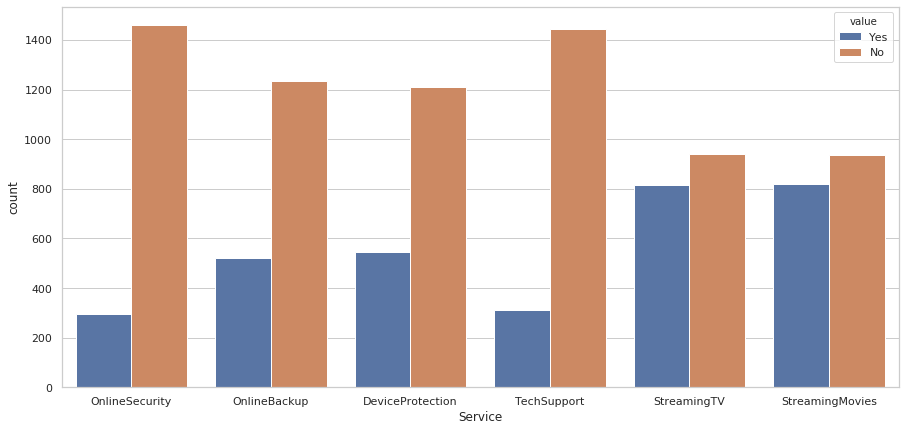

In [269]:
t = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
dft = pd.melt(df[df["InternetService"] != "No"][t])
plt.figure(figsize=(15, 7))
g = sns.countplot(data=df1, x='variable', hue="value")
g.set(xlabel="Service")
plt.show()


In [270]:
dfp=df[df["InternetService"]!="No"]
dfp=dfp[["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies","Churn"]]
for i in t:
    dfp[i+"p"]=dfp[i]

In [271]:
for i in t:
    percy=percent(i,"Yes","Yes")
    percn=percent(i,"No","Yes")
    dfp[i+"p"]=dfp[i+"p"].replace("Yes",percy)
    dfp[i+"p"]=dfp[i+"p"].replace("No",percn)
    

In [272]:
dfp=dfp[dfp["Churn"]!="No"]
df1=dfp[["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]]
df2=dfp[["OnlineSecurityp", "OnlineBackupp", "DeviceProtectionp", "TechSupportp", "StreamingTVp", "StreamingMoviesp"]]

In [273]:
df1=pd.melt(df1)

In [274]:
df2=pd.melt(df2)

In [275]:
y=df2["value"]

In [276]:
df1["prob"]=y

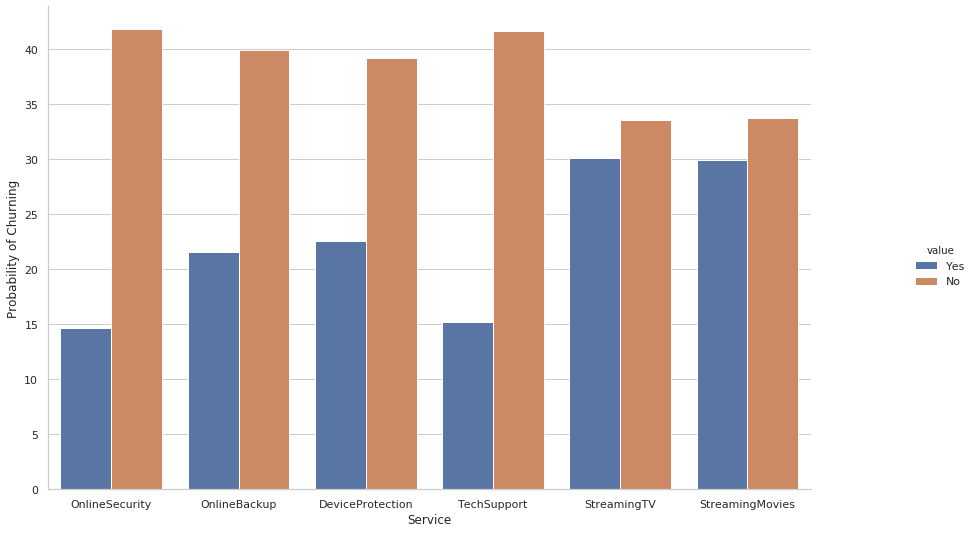

In [278]:
pr = sns.factorplot(data=df1, x="variable", y="prob",hue="value",kind="bar")
pr.set(xlabel="Service",ylabel="Probability of Churning")
fig = plt.gcf()
fig.set_size_inches(15,8, forward = False)
plt.show()

- For all the services mentioned probability of churning is lower for people who avail the services.
- This difference is less pronounced for streaming movies and TV.

## Payment Methods:

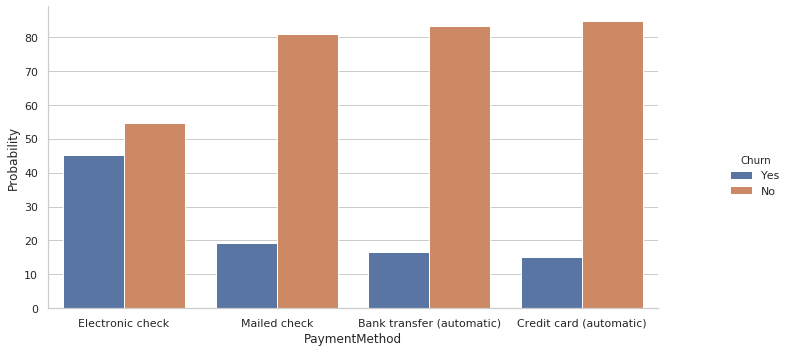

In [294]:
x=[]
y=[]
c=[]
d={"PaymentMethod":x,"Probability":y,"Churn":c}
for i in df["PaymentMethod"].unique():
    x.append(i)
    x.append(i)
    y.append(percent("PaymentMethod",i,"Yes"))
    y.append(percent("PaymentMethod",i,"No"))
    c.append("Yes")
    c.append("No")
d=pd.DataFrame(data=d)   
sns.factorplot(x="PaymentMethod", y="Probability", hue="Churn", data=d, kind="bar")
fig = plt.gcf()
fig.set_size_inches(12,5, forward = False)
plt.show()

- It is evident that people who pay through e-check are more likely  to churn.

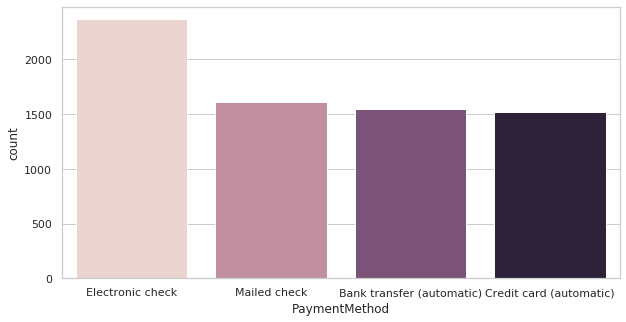

In [302]:
sns.countplot("PaymentMethod",data=df,palette=sns.cubehelix_palette(4))
fig = plt.gcf()
fig.set_size_inches(10,5, forward = False)
plt.show()

- There are higher number of people paying through e-check which is not good as far as churn is concerned.

## Contract:

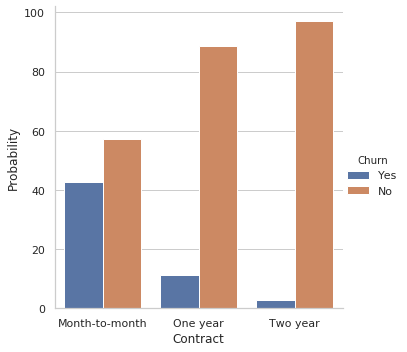

In [304]:
percentPlot("Contract")

- People with shorter contracts are more likely to churn.
- People with 2 year contracts almost never churn.

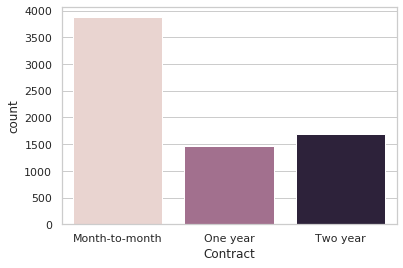

In [307]:
sns.countplot("Contract",data=df,palette=sns.cubehelix_palette(3))

- Majority of people have month to month contracts.

# Corelation

In [334]:
dfr=df.drop(['customerID'],axis=1)
dfr.replace("Yes",1)
dfr.replace("No",0)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,0,1,0,No phone service,DSL,0,Yes,0,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.850000,0
1,Male,0,0,0,34,Yes,0,DSL,Yes,0,Yes,0,0,0,One year,0,Mailed check,56.95,1889.500000,0
2,Male,0,0,0,2,Yes,0,DSL,Yes,Yes,0,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.150002,Yes
3,Male,0,0,0,45,0,No phone service,DSL,Yes,0,Yes,Yes,0,0,One year,0,Bank transfer (automatic),42.30,1840.750000,0
4,Female,0,0,0,2,Yes,0,Fiber optic,0,0,0,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.649994,Yes
5,Female,0,0,0,8,Yes,Yes,Fiber optic,0,0,Yes,0,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.500000,Yes
6,Male,0,0,Yes,22,Yes,Yes,Fiber optic,0,Yes,0,0,Yes,0,Month-to-month,Yes,Credit card (automatic),89.10,1949.400024,0
7,Female,0,0,0,10,0,No phone service,DSL,Yes,0,0,0,0,0,Month-to-month,0,Mailed check,29.75,301.899994,0
8,Female,0,Yes,0,28,Yes,Yes,Fiber optic,0,0,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.050049,Yes
9,Male,0,0,Yes,62,Yes,0,DSL,Yes,Yes,0,0,0,0,One year,0,Bank transfer (automatic),56.15,3487.949951,0


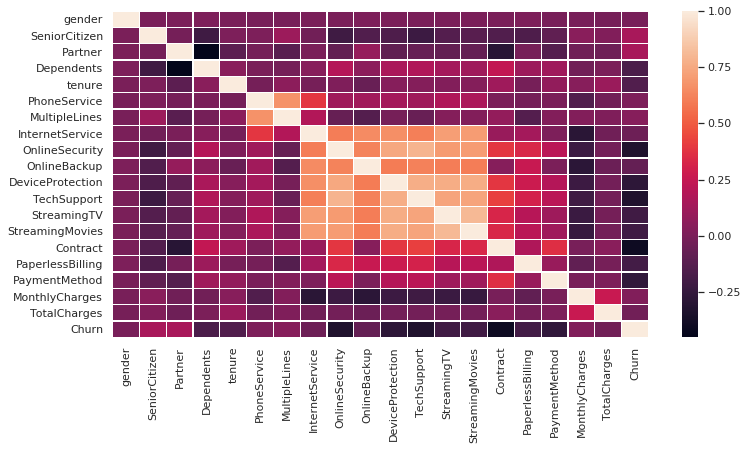

In [335]:
plt.figure(figsize=(12, 6))
corr=dfr.corr()
corr = dfr.apply(lambda x: pd.factorize(x)[0]).corr()
sns.heatmap(corr,xticklabels=True, yticklabels=True,linewidth=.2)

# Conclusion

We have previously seen how various factors affect churn.\
This information coupled with our understanding of co-relation between feature would help us determine the most important features that affect churn.\